# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from IPython.display import HTML


In [2]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# %matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

Text(0.5, 0.92, 'Lorenz System')

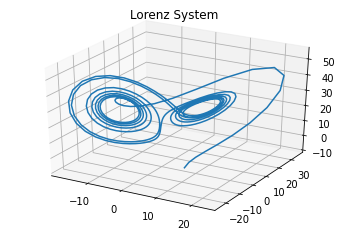

In [3]:
def lorenz(t,y):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        y ((3,) ndarray): The state values (x,y,z)
        
    Returns:
        ((3,) ndarray): The derivative values
        
    """
    # constants
    o = 10
    p = 28
    B = 8/3

    # derivatives
    dx = o*(y[1] - y[0])
    dy = p*y[0] - y[1] - y[0]*y[2]
    dz = y[0]*y[1] - B*y[2]

    return np.array([dx,dy,dz])

# t values
t0 = 0
tf = 10
t_span = (t0, tf)

# random initial values
y0 = np.random.random(size=3)*(30) - 15 # numbers in range [-15, 15]

# set up 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 500))

x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
plt.plot(x,y,z)
plt.title("Lorenz System")


## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

Text(0.5, 1.0120000000000002, 'Lorenz System')

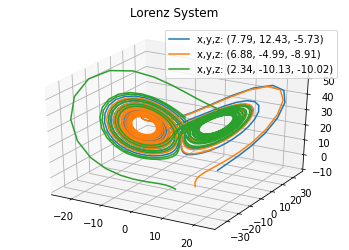

In [4]:
# set up 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# t values
t0 = 0
tf = 15
t_span = (t0, tf)

# random initial values
y0 = np.random.random(size=3)*(30) - 15 # numbers in range [-15, 15]


# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 800))

x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
plt.plot(x,y,z, label="x,y,z: ({}, {}, {})".format(
    y0[0].round(2), y0[1].round(2), y0[2].round(2)))

#######
# new random initial values
y0 = np.random.random(size=3)*(30) - 15 # numbers in range [-15, 15]

# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 800))

x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
plt.plot(x,y,z, label="x,y,z: ({}, {}, {})".format(
    y0[0].round(2), y0[1].round(2), y0[2].round(2)))
#######
# new random initial values
y0 = np.random.random(size=3)*(30) - 15 # numbers in range [-15, 15]

# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 800))

x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
plt.plot(x,y,z, label="x,y,z: ({}, {}, {})".format(
    y0[0].round(2), y0[1].round(2), y0[2].round(2)))

plt.legend(loc='best')
plt.title("Lorenz System", y=1.1)

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

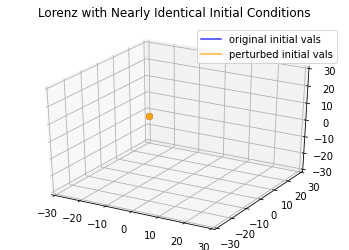

In [5]:
## Get values for IVP

# t values
t0 = 0
tf = 50
t_span = (t0, tf)

# random initial values
y0 = np.random.random(size=3)*(30) - 15 # numbers in range [-15, 15]


# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 1500))

x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
# plt.plot(x,y,z, label="x,y,z: ({}, {}, {})".format(
#     y0[0].round(2), y0[1].round(2), y0[2].round(2)))

###
# new random initial values
noise = np.random.random(3)*(1e-10)
y0 = y0 + noise # small perturbation of original y0

# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 1500))

x_p = sol.y[0]
y_p = sol.y[1]
z_p = sol.y[2]
# plt.plot(x,y,z, label="x,y,z: ({}, {}, {})".format(
#     y0[0].round(2), y0[1].round(2), y0[2].round(2)))


## Get 3D animation

# set up 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30,30))
ax.set_ylim((-30,30))
ax.set_zlim((-30,30))

# set empty lists
first_particle = plt.plot([],[],[], marker='o', color='blue')[0]
first_traj = plt.plot([],[],[], color='blue', label='original initial vals', 
                      alpha=0.8)[0]
second_particle = plt.plot([],[],[], marker='o', color='orange')[0]
second_traj = plt.plot([],[],[], color='orange', label='perturbed initial vals', 
                       alpha=0.8)[0]

# update function
# define update function to step through coordinates
def update(i):
    first_particle.set_data(x[i], y[i])
    first_particle.set_3d_properties(z[i])
    first_traj.set_data(x[:i+1], y[:i+1])
    first_traj.set_3d_properties(z[:i+1])
    second_particle.set_data(x_p[i], y_p[i])
    second_particle.set_3d_properties(z_p[i])
    second_traj.set_data(x_p[:i+1], y_p[:i+1])
    second_traj.set_3d_properties(z_p[:i+1])
    return first_particle, first_traj, second_particle, second_traj

ax.legend(loc='best')
ax.set_title("Lorenz with Nearly Identical Initial Conditions", y=1.1)

# write animation
animation.writer = animation.writers['ffmpeg']
plt.ioff()
ani = animation.FuncAnimation(fig, update, frames=range(len(x)), interval=15)

# save animation
ani.save('lorenz_animation1.mp4')

In [6]:
# load animation
from base64 import b64encode
mp4 = open('lorenz_animation1.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

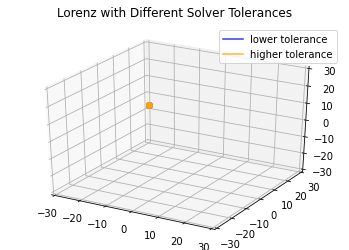

In [7]:
## Get values for IVP

# t values
t0 = 0
tf = 50
t_span = (t0, tf)

# random initial values
y0 = np.random.random(size=3)*(30) - 15 # numbers in range [-15, 15]


# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 1500), 
                atol=1e-15, rtol=1e-13)

x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
# plt.plot(x,y,z, label="x,y,z: ({}, {}, {})".format(
#     y0[0].round(2), y0[1].round(2), y0[2].round(2)))

###
# same initial values
y0 = y0

# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 1500),
                atol=1e-12, rtol=1e-10)

x_p = sol.y[0]
y_p = sol.y[1]
z_p = sol.y[2]
# plt.plot(x,y,z, label="x,y,z: ({}, {}, {})".format(
#     y0[0].round(2), y0[1].round(2), y0[2].round(2)))


## Get 3D animation

# set up 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30,30))
ax.set_ylim((-30,30))
ax.set_zlim((-30,30))

# set empty lists
first_particle = plt.plot([],[],[], marker='o', color='blue')[0]
first_traj = plt.plot([],[],[], color='blue', label='lower tolerance', 
                      alpha=0.8)[0]
second_particle = plt.plot([],[],[], marker='o', color='orange')[0]
second_traj = plt.plot([],[],[], color='orange', label='higher tolerance',
                       alpha=0.8)[0]

# update function
# define update function to step through coordinates
def update(i):
    first_particle.set_data(x[i], y[i])
    first_particle.set_3d_properties(z[i])
    first_traj.set_data(x[:i+1], y[:i+1])
    first_traj.set_3d_properties(z[:i+1])
    second_particle.set_data(x_p[i], y_p[i])
    second_particle.set_3d_properties(z_p[i])
    second_traj.set_data(x_p[:i+1], y_p[:i+1])
    second_traj.set_3d_properties(z_p[:i+1])
    return first_particle, first_traj, second_particle, second_traj

ax.legend(loc='best')
ax.set_title("Lorenz with Different Solver Tolerances", y=1.1)

# write animation
animation.writer = animation.writers['ffmpeg']
plt.ioff()
ani = animation.FuncAnimation(fig, update, frames=range(len(x)), interval=20)

# save animation
ani.save('lorenz_animation2.mp4')

In [8]:
# load animation
from base64 import b64encode
mp4 = open('lorenz_animation2.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

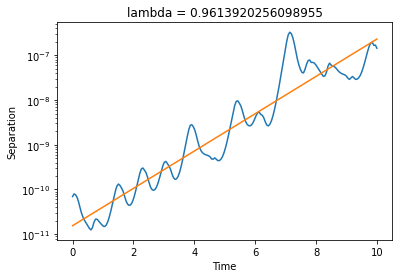

In [43]:
# produce initial condition
# t values
t0 = 0
tf = 10
t_span = (t0, tf)
t = np.linspace(t0, tf, 200)

# random initial values
y0 = np.random.random(size=3)*(30) - 15 # numbers in range [-15, 15]


# solve IVP
sol = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 200))

y0 = sol.y[:, -1]

# produce second initial condition with noise
# new random initial values
noise = np.random.random(3)*(1e-10)
y_noise = y0 + noise # small perturbation of original y0


# solve
sol1 = solve_ivp(lorenz, t_span, y0, t_eval=np.linspace(t0, tf, 200))
sol2 = solve_ivp(lorenz, t_span, y_noise, t_eval=np.linspace(t0, tf, 200))

# get delta (t) by taking norm along each column
delta = np.linalg.norm(sol1.y-sol2.y, axis=0)

res = linregress(t, np.log(delta))


plt.figure()
plt.title("lambda = {}".format(res.slope))
plt.semilogy(t, delta)
plt.semilogy(t, np.exp(res.slope*t  + res.intercept))
plt.xlabel("Time")
plt.ylabel("Separation")
plt.show()